In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

import pandas as pd 

# importing functions
import sys
sys.path.append('/Users/audreyburggraf/Desktop/THESIS/Functions')

from functions import *

from unit_conversion_functions import *

In [2]:
df = pd.read_csv('/Users/audreyburggraf/Desktop/THESIS/Gaia Data Files/gaia_data.csv')

#  add the absolute gaia K band magnitude and stellar mass
df["M_ks"] = df.ks_m + 5 + 5*np.log10(df.parallax/1000)

# cut off certain range 
df = df[(4 < df.M_ks) & (df.M_ks < 11)].reset_index(drop=True)

# set the stellar mass 
df["stellar_mass"] =  find_star_mass(df.M_ks)

In [7]:
N1 = 70
N2 = 70000

seed = 8

# call function
parameter_result, synthetic_result, model_result, error_result = find_signal_components(df, N1, N2, print_params='both')

# break down the result statement 

# setting the no planet and 1 planet parameter arrays in their proper units 
# np_parameters = [alpha0, delta0, mu_alpha, mu_delta, parallax]
# parameters = [alpha0, delta0, mu_alpha, mu_delta, parallax, m_star, e, omega, Omega, cos_i, m_planet, P_orb, t_peri]

# parameter_result includes the no planet and 1 planet parameters in their proper units 
# parameter_result = [np_parameters, parameters]

# model_results includes the signal components and times for the synthetic in [uas] and [years]
(prop_ra_synthetic, prop_dec_synthetic, 
 parallax_ra_synthetic, parallax_dec_synthetic, 
 planetary_ra_synthetic, planetary_dec_synthetic, 
 times_synthetic) = synthetic_result

# model_results includes the signal components and times for the model in [uas] and [years]
(prop_ra_model, prop_dec_model, 
 parallax_ra_model, parallax_dec_model, 
 planetary_ra_model, planetary_dec_model, 
 times_model) = model_result

# error_result includes noise in ra and dec direction plus error (same for ra and dec) in [uas]
(noise_ra, noise_dec, errors) = error_result

N for synthetic data:  70
N for model data:  70000
 
Planetary parameters:
e: 0.13886774265101498  [unitless]
omega: 6.057795992291601  [radians]
Omega: 0.7962726865203742  [radians]
cos_i: 0.8193583151077969  [unitless]
m_planet: 3.3469917390567865  [Jupiter masses]
P_orb: 0.12211016028119667  [years]
t_peri: 0.07495858844270835  [years]
 
Gaia parameters:
alpha0: 1  [degrees]
delta0: 2  [degrees]
mu_alpha: -5.0478212077605935  [mas/year]
mu_delta: 6.461956516143272  [mas/year]
parallax: 50  [mas]
m_star: 0.3443370952432921  [M_sun]
x =  105890
 
astrometric_signature( [3.34699174] [0.3443371] [0.12211016] [20.] ) =  [80.03628436] [uas]


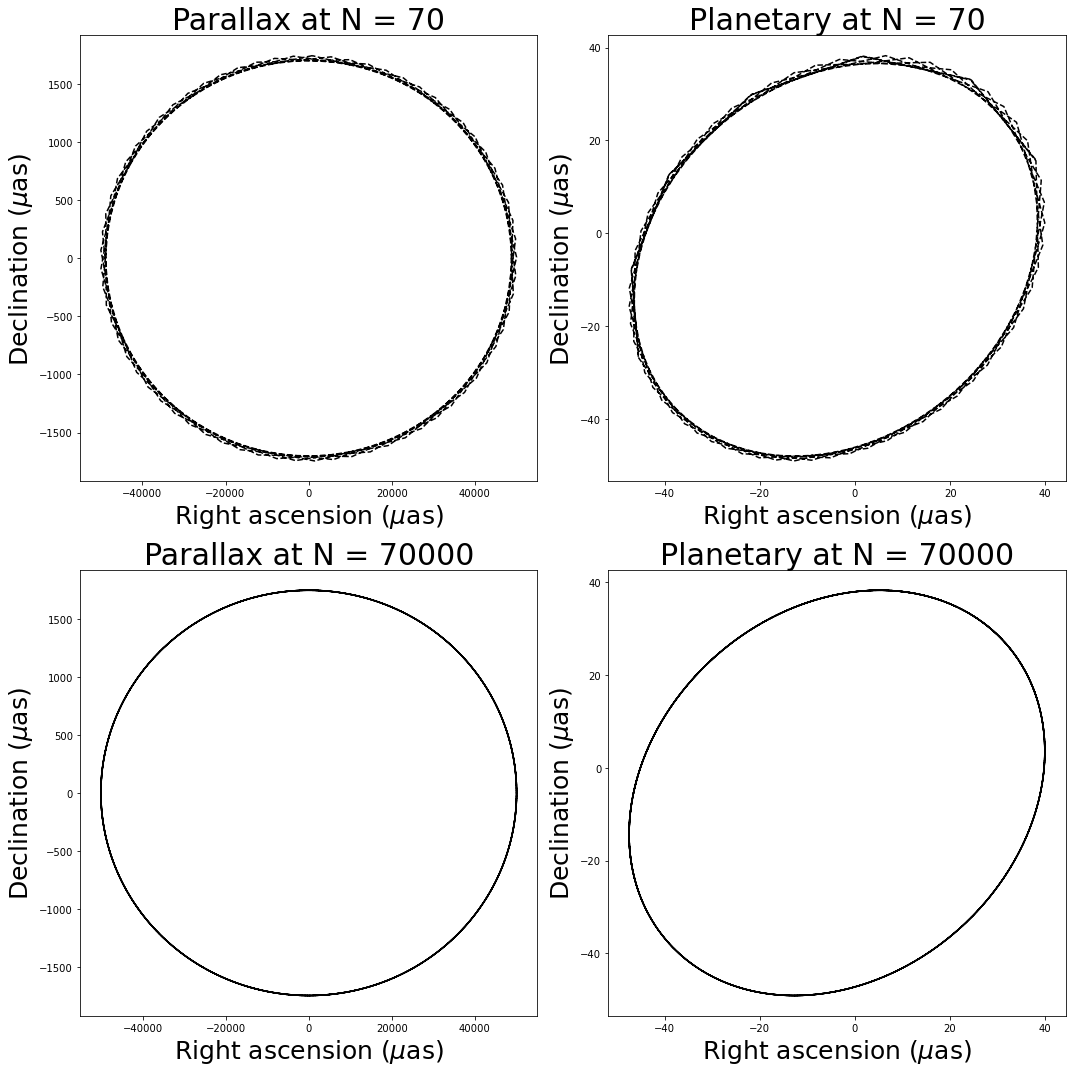

In [8]:
import matplotlib.pyplot as plt

scale = 1.5
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10*scale, 10*scale))
axes = [[ax1, ax2], [ax3, ax4]]

# Parallax plot
ax1.plot(parallax_ra_synthetic, 
         parallax_dec_synthetic, 
         color='black', 
         lw=1.5,           
         ls='--', 
         label='Model')

# Planetary plot
ax2.plot(planetary_ra_synthetic, 
         planetary_dec_synthetic, 
         color='black', 
         lw=1.5,           
         ls='--', 
         label='Model')

# Repeat the same plots for the second row
ax3.plot(parallax_ra_model, 
         parallax_dec_model, 
         color='black', 
         lw=1.5,           
         ls='--', 
         label='Model')

ax4.plot(planetary_ra_model, 
         planetary_dec_model, 
         color='black', 
         lw=1.5,           
         ls='--', 
         label='Model')

# Customize legends, titles, and labels for each subplot
titles = ['Parallax', 'Planetary']
big_font = 30
small_font = 25

for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        # Set titles for each subplot including N
        N_value = N1 if i == 0 else N2
        ax.set_title(f'{titles[j]} at N = {N_value}', fontsize=big_font)
        ax.set_xlabel('Right ascension ($\mu$as)', fontsize=small_font)
        ax.set_ylabel('Declination ($\mu$as)', fontsize=small_font)

# Display the plots
plt.tight_layout()

# plt.savefig("/Users/audreyburggraf/Desktop/double.png", dpi=300)

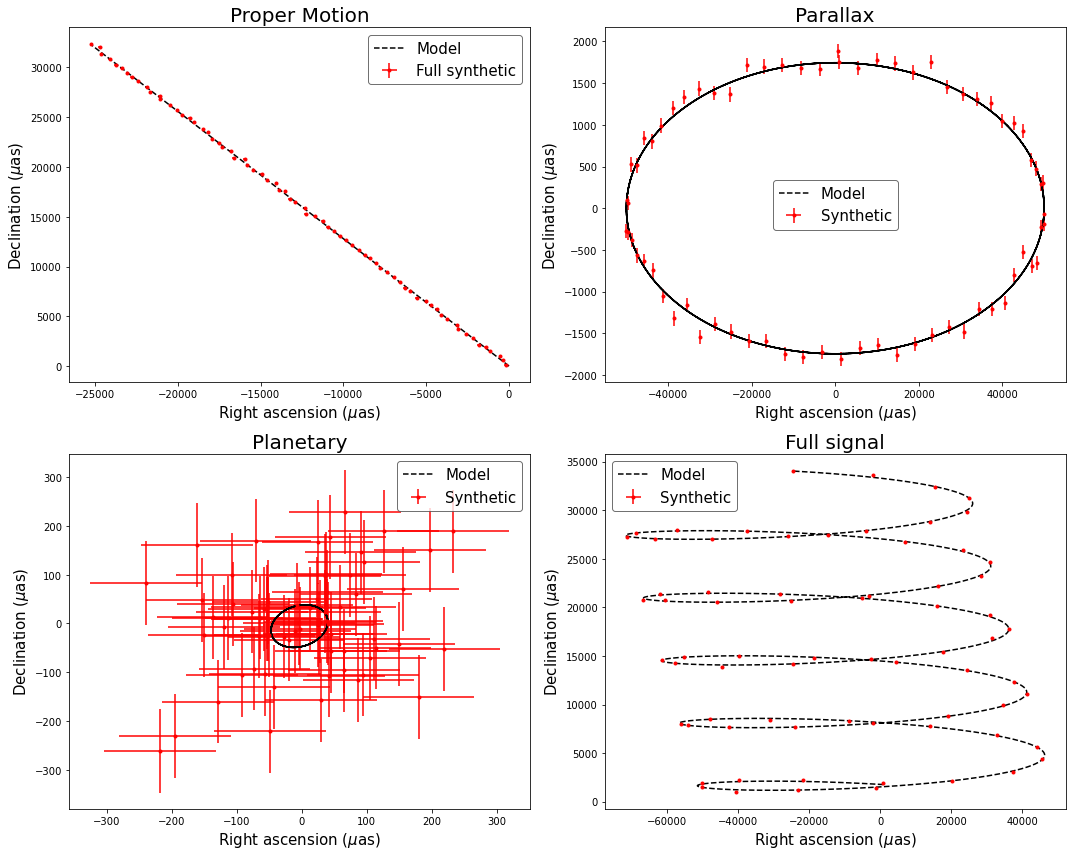

In [9]:
# Create a 2x2 grid of plots
scale = 1.5
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10*scale, 8*scale))
axes = [ax1, ax2, ax3, ax4]

# Proper motion plot
ax1.plot(prop_ra_model, 
         prop_dec_model, 
         color='black', 
         lw=1.5,           
         ls='--', 
         label = 'Model')

ax1.errorbar(prop_ra_synthetic+noise_ra, 
         prop_dec_synthetic+noise_dec, 
         yerr=errors,
         xerr=errors,
         color='red', 
         label = 'Full synthetic',
         fmt='.')

# Parallax plot
ax2.plot(parallax_ra_model, 
         parallax_dec_model, 
         color='black', 
         lw=1.5,           
         ls='--', 
         label = 'Model')

ax2.errorbar(parallax_ra_synthetic+noise_ra, 
         parallax_dec_synthetic+noise_dec, 
         yerr=errors,
         xerr=errors,
         color='red', 
         label = 'Synthetic',
         fmt='.')

# Planetary plot
ax3.plot(planetary_ra_model, 
         planetary_dec_model, 
         color='black', 
         lw=1.5,           
         ls='--', 
         label = 'Model')

ax3.errorbar(planetary_ra_synthetic+noise_ra, 
         planetary_dec_synthetic+noise_dec, 
         yerr=errors,
         xerr=errors,
         color='red', 
         label = 'Synthetic',
         fmt='.')

# Full signal plot
model_ra_synthetic = prop_ra_synthetic + parallax_ra_synthetic + planetary_ra_synthetic 
model_dec_synthetic = prop_dec_synthetic + parallax_dec_synthetic + planetary_dec_synthetic

model_ra_model = prop_ra_model + parallax_ra_model + planetary_ra_model 
model_dec_model = prop_dec_model + parallax_dec_model + planetary_dec_model

ax4.plot(model_ra_model, 
         model_dec_model, 
         color='black', 
         lw=1.5,           
         ls='--', 
         label = 'Model')

ax4.errorbar(model_ra_synthetic+noise_ra, 
         model_dec_synthetic+noise_dec, 
         yerr=errors,
         xerr=errors,
         color='red', 
         label = 'Synthetic',
         fmt='.')


axes = [ax1, ax2, ax3, ax4]
titles = ['Proper Motion', 'Parallax', 'Planetary', 'Full signal']
small_font = 15
big_font = 20

# Create and customize legends for all subplots in a loop
for i, ax in enumerate(axes):
    legend = ax.legend(loc="best", frameon=True, markerscale=1, fontsize=small_font)
    legend.get_frame().set_edgecolor('0.3')
    legend.get_frame().set_linewidth(1)
    
    # Set titles for each subplot
    ax.set_title(titles[i], fontsize= big_font)
    ax.set_xlabel('Right ascension ($\mu$as)', fontsize= small_font)
    ax.set_ylabel('Declination ($\mu$as)', fontsize= small_font)

# Display the plots
plt.tight_layout()
plt.show()